In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
or_train=pd.read_csv("train_ctrUa4K.csv")
or_test=pd.read_csv("test_lAUu6dG.csv")

In [3]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [4]:
train.shape

(614, 13)

In [5]:
test.shape

(367, 12)

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


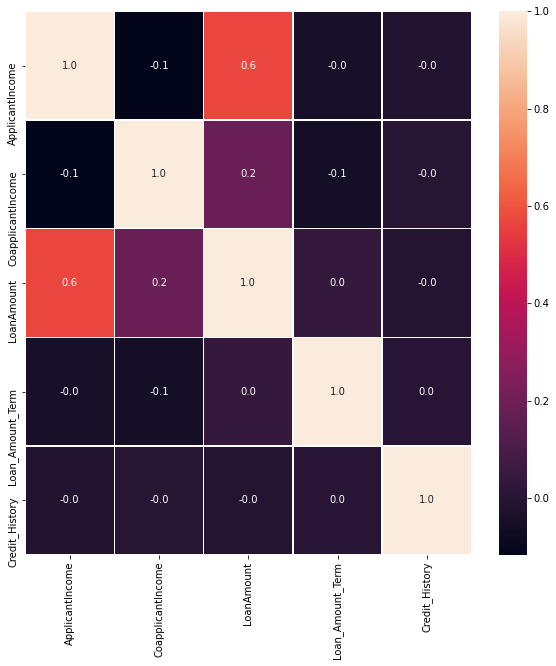

In [8]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

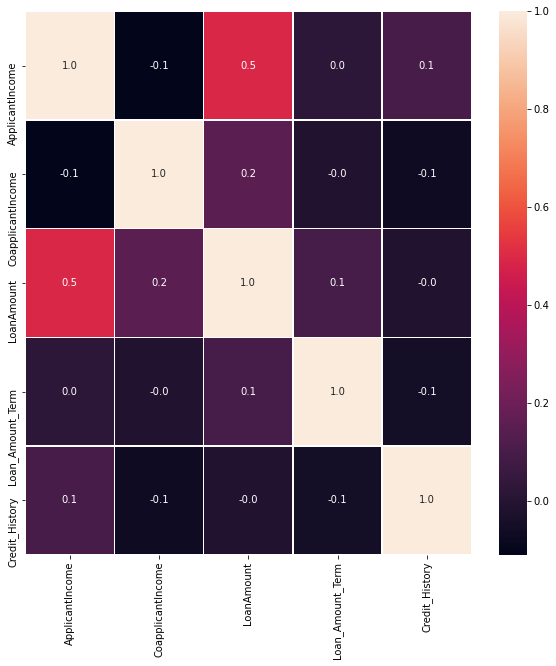

In [9]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

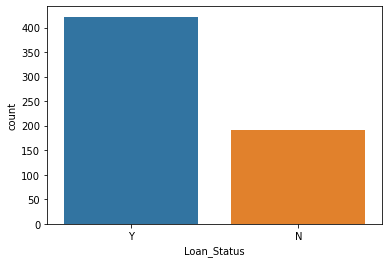

In [11]:
ay=train[train['Loan_Status']=='Y']
an=train[train['Loan_Status']=='N']
sns.countplot(train['Loan_Status'], label = "Count") 

In [12]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [16]:
#filling numerical var
train['ApplicantIncome']=train['ApplicantIncome'].fillna(train['ApplicantIncome'].mean())
#filling numeric no
s = (train.dtypes == 'float64')
object_cols = list(s[s].index)
print(object_cols)
for col in object_cols:
    train[col] = train[col].fillna(train[col].mean())
train.isna().sum()

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#filling numerical var
test['CoapplicantIncome']=test['CoapplicantIncome'].astype(float)
test['ApplicantIncome']=test['ApplicantIncome'].fillna(test['ApplicantIncome'].mean())
#filling numeric no
s = (test.dtypes == 'float64')
object_cols = list(s[s].index)
print(object_cols)
for col in object_cols:
    test[col] = test[col].fillna(test[col].mean())
test.isna().sum()

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

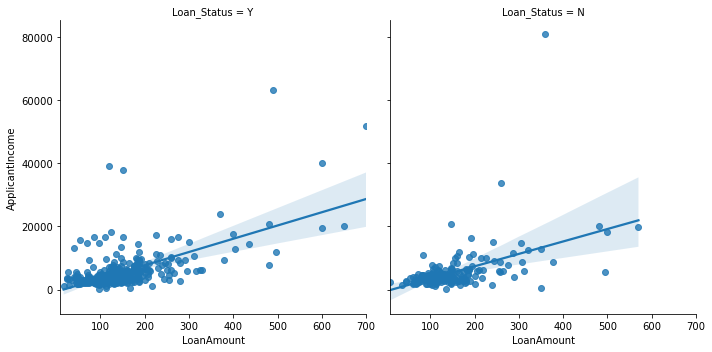

In [18]:
#Relationship with working years and income- Joint & lm Plot¶
sns.lmplot(x = 'LoanAmount', y = 'ApplicantIncome', data = train, col = 'Loan_Status')
plt.show()


In [19]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [20]:
print(train['Gender'].mode())
print(train['Married'].mode())
print(train['Dependents'].mode())
print(train['Self_Employed'].mode())


0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object


In [21]:
#filling categorical var
train['Gender']=train['Gender'].apply(lambda x: str(x).replace('nan','Male'))
train['Married']=train['Married'].apply(lambda x: str(x).replace('nan','Yes'))
train['Dependents']=train['Dependents'].apply(lambda x: str(x).replace('nan','0'))
train['Self_Employed']=train['Self_Employed'].apply(lambda x: str(x).replace('nan','No'))

In [22]:
print(test['Gender'].mode())
print(test['Dependents'].mode())
print(test['Self_Employed'].mode())


0    Male
dtype: object
0    0
dtype: object
0    No
dtype: object


In [23]:
#filling categorical var
test['Gender']=test['Gender'].apply(lambda x: str(x).replace('nan','Male'))
test['Dependents']=test['Dependents'].apply(lambda x: str(x).replace('nan','0'))
test['Self_Employed']=test['Self_Employed'].apply(lambda x: str(x).replace('nan','No'))

In [24]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [26]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [27]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
#encodeing all categorical var
s = (train.dtypes == 'object')


object_cols = list(s[s].index)
print(object_cols.remove('Loan_Status'))
print("Categorical variables:")
print(object_cols)
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    train[col] = label_encoder.fit_transform(train[col])


None
Categorical variables:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [30]:
#encodeing all categorical var
s = (test.dtypes == 'object')


object_cols = list(s[s].index)
#print(object_cols.remove('Dependents'))
print("Categorical variables:")
print(object_cols)

from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    test[col] = label_encoder.fit_transform(test[col])


Categorical variables:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [31]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [33]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.0,360.0,1.000000,2
1,1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.000000,2
2,2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.000000,2
3,3,1,1,2,0,0,2340,2546.0,100.0,360.0,0.825444,2
4,4,1,0,0,1,0,3276,0.0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.000000,2
363,363,1,1,0,0,0,4158,709.0,115.0,360.0,1.000000,2
364,364,1,0,0,0,0,3250,1993.0,126.0,360.0,0.825444,1
365,365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.000000,0


In [34]:
np.unique(test['Dependents'])

array([0, 1, 2, 3])

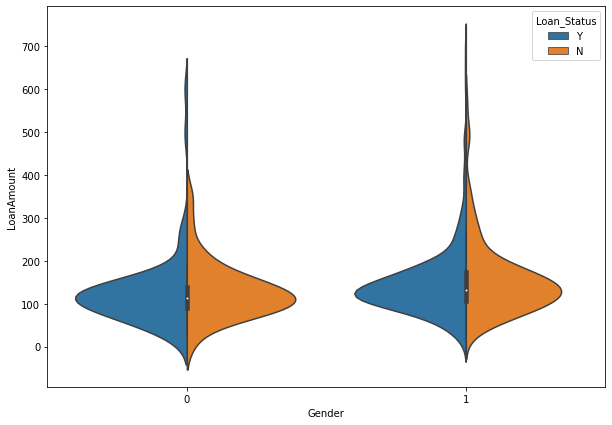

In [35]:
#gender vs mothlyincome
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='LoanAmount',hue='Loan_Status',split=True,data=train)

<ipython-input-36-bfe848e80736>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(train['Education'],train['LoanAmount'],color=color,width=0.5)


<BarContainer object of 614 artists>

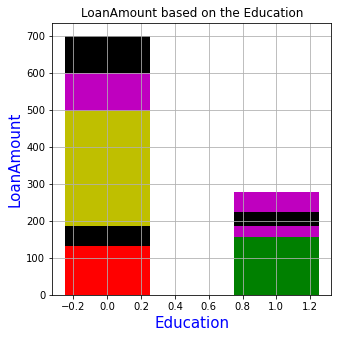

In [36]:
color='cmykrgb'
plt.figure(figsize=(5,5))
plt.title('LoanAmount based on the Education')
plt.xlabel('Education',fontsize=15,color='b')
plt.ylabel('LoanAmount',fontsize=15,color='b')
plt.grid()
plt.bar(train['Education'],train['LoanAmount'],color=color,width=0.5)

In [37]:
test.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [38]:
X_train=train.iloc[:,1:-1].values
y_train=train.iloc[:,-1].values
X_test=test.iloc[:,1:]

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)
ev1=classifier1.predict(X_train)

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier()
classifier2.fit(X_train,y_train)
# Predicting the Test set results
y_pred2= classifier2.predict(X_test)
ev2=classifier2.predict(X_train)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier3=LogisticRegression()
classifier3.fit(X_train,y_train)
# Predicting the Test set results
y_pred3 = classifier3.predict(X_test)
ev3=classifier3.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train,y_train)
# Predicting the Test set results
y_pred4 = classifier4.predict(X_test)
ev4=classifier4.predict(X_train)

In [43]:
from sklearn.svm import SVC
classifier5 = SVC(kernel = 'linear', random_state = 0)
classifier5.fit(X_train,y_train)
# Predicting the Test set results
y_pred5 = classifier5.predict(X_test)
ev5=classifier5.predict(X_train)

In [44]:
from sklearn.svm import SVC
classifier6 = SVC(kernel = 'rbf', random_state = 0)
classifier6.fit(X_train, y_train)
# Predicting the Test set results
y_pred6= classifier6.predict(X_test)
ev6=classifier6.predict(X_train)

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier7= GaussianNB()
classifier7.fit(X_train, y_train)
# Predicting the Test set results
y_pred7 = classifier7.predict(X_test)
ev7=classifier7.predict(X_train)

In [46]:
sf=pd.DataFrame(y_pred1,columns=['Loan_Status'])
df = pd.concat([or_test.Loan_ID,sf['Loan_Status']], axis=1)

In [47]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [52]:
from sklearn.metrics import mean_squared_error
import math
#classification report
#accuracy
from sklearn import metrics
print("model source:",classifier1.score(X_train,y_train))
print("model source:",classifier2.score(X_train,y_train))
print("model source:",classifier3.score(X_train,y_train))
print("model source:",classifier4.score(X_train,y_train))
print("model source:",classifier5.score(X_train,y_train))
print("model source:",classifier6.score(X_train,y_train))
print("model source:",classifier7.score(X_train,y_train))

model source: 0.990228013029316
model source: 1.0
model source: 0.8127035830618893
model source: 0.7296416938110749
model source: 0.7947882736156352
model source: 0.6921824104234527
model source: 0.7980456026058632


In [53]:
df.to_csv('submission.csv',index=False)
